<a href="https://colab.research.google.com/github/D-a-n-l/SAI/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving spambase_csv.csv to spambase_csv (1).csv


In [10]:
import pandas as pd

df = pd.read_csv('spambase_csv.csv')
print('Первые 25 строк данных:')
print(df.head(25))

Первые 25 строк данных:
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0             0.00               0.64           0.64           0.0   
1             0.21               0.28           0.50           0.0   
2             0.06               0.00           0.71           0.0   
3             0.00               0.00           0.00           0.0   
4             0.00               0.00           0.00           0.0   
5             0.00               0.00           0.00           0.0   
6             0.00               0.00           0.00           0.0   
7             0.00               0.00           0.00           0.0   
8             0.15               0.00           0.46           0.0   
9             0.06               0.12           0.77           0.0   
10            0.00               0.00           0.00           0.0   
11            0.00               0.00           0.25           0.0   
12            0.00               0.69           0.34           0.0

In [11]:
WORD_FREQ_PREFIX = 'word_freq_'

# Выбираем только спамные письма
spam_emails = df[df['class'] == 1]

word_columns = []
for column_name in df.columns:
    if column_name.startswith(WORD_FREQ_PREFIX):
        word_columns.append(column_name)

word_scores = {}
for word_column in word_columns:
    word = word_column.replace(WORD_FREQ_PREFIX, '')
    average_freq = spam_emails[word_column].mean()
    word_scores[word] = average_freq

sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
print("Топ-10 самых частых слов в спамных письмах:")
print("=" * 60)

for i in range(10):
    word, frequency = sorted_words[i]
    print(f"{i+1:2}. Слово '{word}' - средняя частота: {frequency:.4f}")

print("=" * 60)

print(f"\n{10} самых редких слов в спамных письмах:")
print("=" * 60)
for i in range(10):
    word, frequency = sorted_words[-(i+1)]
    print(f"{i+1:2}. Слово '{word}' - средняя частота: {frequency:.6f}")
print("=" * 60)

print(f"\nВсего проанализировано спамных писем: {len(spam_emails)}")
print(f"Всего уникальных слов в данных: {len(sorted_words)}")

Топ-10 самых частых слов в спамных письмах:
 1. Слово 'you' - средняя частота: 2.2645
 2. Слово 'your' - средняя частота: 1.3804
 3. Слово 'will' - средняя частота: 0.5500
 4. Слово 'free' - средняя частота: 0.5184
 5. Слово 'our' - средняя частота: 0.5140
 6. Слово 'all' - средняя частота: 0.4038
 7. Слово 'mail' - средняя частота: 0.3505
 8. Слово 'email' - средняя частота: 0.3192
 9. Слово 'business' - средняя частота: 0.2875
10. Слово 'remove' - средняя частота: 0.2754

10 самых редких слов в спамных письмах:
 1. Слово 'cs' - средняя частота: 0.000055
 2. Слово '857' - средняя частота: 0.000518
 3. Слово 'lab' - средняя частота: 0.000684
 4. Слово 'table' - средняя частота: 0.001219
 5. Слово 'telnet' - средняя частота: 0.001274
 6. Слово 'george' - средняя частота: 0.001550
 7. Слово '415' - средняя частота: 0.001776
 8. Слово 'conference' - средняя частота: 0.002101
 9. Слово 'meeting' - средняя частота: 0.002443
10. Слово 'parts' - средняя частота: 0.004710

Всего проанализирова

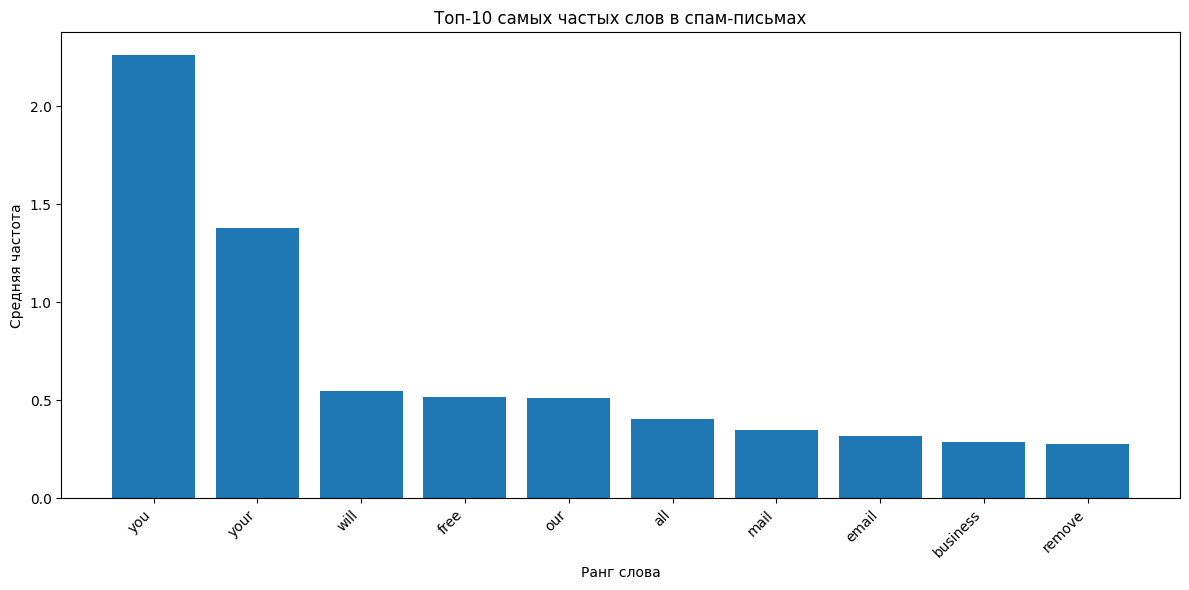

In [19]:
import matplotlib.pyplot as plt

top_words_for_chart = sorted_words[:10]

words = [item[0] for item in top_words_for_chart]
frequencies = [item[1] for item in top_words_for_chart]

plt.figure(figsize=(12, 6))
plt.bar(range(10), frequencies)
plt.xlabel('Ранг слова')
plt.ylabel('Средняя частота')
plt.title('Топ-10 самых частых слов в спам-письмах')
plt.xticks(range(10), words, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
df.to_csv('new_spambase.csv', index=False, encoding='utf-8')